Name: Pruthvi Shyam Billa

Course: BUDT704

Section: 501

Date: 11/04/22

# Solar System Moons Analysis

In [1]:
# Load the libraries required for the data wrangling and analysis

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import regex as re

Below we will be loading the list of the recognized moons of the planets and largest potential dwarf planets in our Solar System. Information for gaining insights is done on the dataset available on wikipedia page:


In [2]:
# Load the dataset from the webpage indexing the correct table

df = pd.read_html('https://en.wikipedia.org/wiki/List_of_natural_satellites#List')[6]

# Display the output printing the first ten rows of the dataframe

df.head(10)

,Image,Parent,Numeral,Name,Mean radius (km),Orbital semi-major axis (km),Sidereal period (d) (r = retrograde),Angular size from the parent surface [arcmin],Discovery year,Discovered by,Notes,Ref(s)
0,NaN,Earth,I (1),Moon,1738,384399,27.321582,31.61038[11],Prehistoric,—,Synchronous rotation,[12]
1,NaN,Mars,I (1),Phobos,11.267,9380,0.319,12.93259,1877,Hall,NaN,[13][14][15]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,2.12397,1877,Hall,NaN,[13][14][15]
3,NaN,Jupiter,I (1),Io,"1,821.6±0.5",421800,1.769,35.59190,1610,Galileo,Main-group moon (Galilean),[15][16]
4,NaN,Jupiter,II (2),Europa,"1,560.8±0.5",671100,3.551,17.85008,1610,Galileo,Main-group moon (Galilean),[15][16]
5,NaN,Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,18.10189,1610,Galileo,Main-group moon (Galilean),[15][16]
6,NaN,Jupiter,IV (4),Callisto,"2,410.3±1.5",1882700,16.69,9.14172,1610,Galileo,Main-group moon (Galilean),[15][16]
7,NaN,Jupiter,V (5),Amalthea,83.5±2,181400,0.498,5.14942,1892,Barnard,Inner moon (Amalthea),[14][15][17]
8,NaN,Jupiter,VI (6),Himalia,69.8,11461000,250.56,0.04213,1904,Perrine,Prograde irregular (Himalia),[14][15][18][19]
9,NaN,Jupiter,VII (7),Elara,43,11741000,259.64,0.02533,1905,Perrine,Prograde irregular (Himalia),[14][15][20]


## Data Cleaning/Validation Tasks
### Renaming

First, let us rename the column names appropriately for our analysis:


1. Parent is renamed as Planet because this column contains the names of the planets such as Earth, Mars etc. and dwarf planets in our solar system.

2. The Name column refers to the details of Natural Satellites corresponding to their planets.

3. Mean Radius is the average distance from the physical center to the surface. 
 Note: Units for the values depicted in this column are in kilometers, and we have omitted units from column name.

4. Orbital Semi-Major Axis, Sidereal Period, and Angular Size have been updated for the respective columns by maintaining consistency having no special characters. 

5. The two columns related to the discovery of the moons for the list of planets are named as Discovery Year and Discoverer.

6. Last column that we are going to rename is for References. This column contains details for citation purposes for using the information for each planet listed.

    Descriptions:

- The angular diameter, angular size, apparent diameter, or apparent size is an angular distance describing how large a sphere or circle appears from a given point of view. 

- Discoverer: The first person to find/observe about the moon.
    


Renaming is done to keep a proper format for column names(capitalized words) and convey the meaning accordingly.


In [3]:
# Rename the columns for better understanding

df = df.rename(columns=({"Parent":"Planet", "Name":"Natural Satellite", "Mean radius (km)":"Mean Radius",
                    "Orbital semi-major axis (km)":"Orbital Semi-Major Axis",
                    "Sidereal period (d) (r = retrograde)":"Sidereal Period",
                    "Angular size from the parent surface [arcmin]":"Angular Size", "Discovery year":"Discovery Year",
                    "Discovered by":"Discoverer","Ref(s)":"Reference",}))

# Display output printing the first 5 rows

df.head()

,Image,Planet,Numeral,Natural Satellite,Mean Radius,Orbital Semi-Major Axis,Sidereal Period,Angular Size,Discovery Year,Discoverer,Notes,Reference
0,NaN,Earth,I (1),Moon,1738,384399,27.321582,31.61038[11],Prehistoric,—,Synchronous rotation,[12]
1,NaN,Mars,I (1),Phobos,11.267,9380,0.319,12.93259,1877,Hall,NaN,[13][14][15]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,2.12397,1877,Hall,NaN,[13][14][15]
3,NaN,Jupiter,I (1),Io,"1,821.6±0.5",421800,1.769,35.59190,1610,Galileo,Main-group moon (Galilean),[15][16]
4,NaN,Jupiter,II (2),Europa,"1,560.8±0.5",671100,3.551,17.85008,1610,Galileo,Main-group moon (Galilean),[15][16]


### Reordering

Now, let us reorder the columns in sequence and try to group columns that have almost similar descriptions or values:


- In our solar system, the first two planets nearest to the Sun: Mercury and Venus do not have any natural satellites.
- We have reordered Planet name as the first column having values in order of increasing distance from the Sun. 
- The second column is the first column Planet's natural satellite.
- The third column Numeral illustrates number of moons ordered by Planet in Roman numeral designations. Those moons whose orbits are not yet known well enough as listed after those that do.
- Next two columns gives the details regarding when the moon was discovered and by whom.
- Further, we now have alphanumeric value columns showing length/time data/size.
- Finally, Notes and Reference are ordered as these give additional descriptions for the natural satellites.

Note: Image column is moved from first to last position as it has NaN values.


Column indexes used for reordering after renaming:

0. Image
1. Planet
2. Numeral
3. Natural Satellite
4. Mean Radius
5. Orbital Semi-Major Axis
6. Sidereal Period
7. Angular Size
8. Discovery Year
9. Discoverer
10. Notes
11. Reference

In [4]:
# Reordering the columns using the indices

df = df.iloc[:,[1,3,2,8,9,4,5,6,7,10,11,0]]

# Display output printing the first 5 rows

df.head()

,Planet,Natural Satellite,Numeral,Discovery Year,Discoverer,Mean Radius,Orbital Semi-Major Axis,Sidereal Period,Angular Size,Notes,Reference,Image
0,Earth,Moon,I (1),Prehistoric,—,1738,384399,27.321582,31.61038[11],Synchronous rotation,[12],NaN
1,Mars,Phobos,I (1),1877,Hall,11.267,9380,0.319,12.93259,NaN,[13][14][15],NaN
2,Mars,Deimos,II (2),1877,Hall,6.2±0.18,23460,1.262,2.12397,NaN,[13][14][15],NaN
3,Jupiter,Io,I (1),1610,Galileo,"1,821.6±0.5",421800,1.769,35.59190,Main-group moon (Galilean),[15][16],NaN
4,Jupiter,Europa,II (2),1610,Galileo,"1,560.8±0.5",671100,3.551,17.85008,Main-group moon (Galilean),[15][16],NaN


### Interesting fact

How many moons does each planet, dwarf planet have in decreasing order? Let us find out:

In [5]:
# Display the number of natural satellites for each planet in the dataframe.

df['Planet'].str.get_dummies().sum().sort_values(ascending=False)

Saturn       83
Jupiter      80
Uranus       27
Neptune      14
Pluto         5
Mars          2
Haumea        2
Orcus         1
Salacia       1
Quaoar        1
2003 AZ84     1
2013 FY27     1
Makemake      1
Gonggong      1
Eris          1
Earth         1
Varda         1
dtype: int64

### Indexing

Let us set the indexes with Planet and Natural Satellite columns for our analysis purposes.

We are selecting these two columns for below reasons:

1. Few of the planets in our solar system have high number of moons. As seen in our interesting fact findings, Saturn and Jupiter have atleast 80 moons each.

2. To make the combination unique, we are adding natural satellites column. It also provides multiple hierarchy indexing for the dataframe and can be related as a composite primary key in terms of database terminology.

3. Other columns have no special advantage of using as an index for gaining insights.



Note: We have two unnamed moons in the dataframe, but their planet name are different. Still satisfying our requirement of being indices combinations being unique.

In [6]:
# Set the index 

df = df.set_index(['Planet', 'Natural Satellite'])

# Display output printing the first 5 rows

df.head()

Numeral Discovery Year Discoverer  Mean Radius  \
Planet  Natural Satellite                                                  
Earth   Moon                I (1)    Prehistoric          —         1738   
Mars    Phobos              I (1)           1877       Hall       11.267   
        Deimos             II (2)           1877       Hall     6.2±0.18   
Jupiter Io                  I (1)           1610    Galileo  1,821.6±0.5   
        Europa             II (2)           1610    Galileo  1,560.8±0.5   

                          Orbital Semi-Major Axis Sidereal Period  \
Planet  Natural Satellite                                           
Earth   Moon                               384399       27.321582   
Mars    Phobos                               9380           0.319   
        Deimos                              23460           1.262   
Jupiter Io                                 421800           1.769   
        Europa                             671100           3.551   

                           Angular Size                       Notes  \
Planet  Natural Satellite                                             
Earth   Moon               31.61038[11]        Synchronous rotation   
Mars    Phobos                 12.93259                         NaN   
        Deimos                  2.12397                         NaN   
Jupiter Io                     35.59190  Main-group moon (Galilean)   
        Europa                 17.85008  Main-group moon (Galilean)   

                              Reference  Image  
Planet  Natural Satellite                       
Earth   Moon                       [12]    NaN  
Mars    Phobos             [13][14][15]    NaN  
        Deimos             [13][14][15]    NaN  
Jupiter Io                     [15][16]    NaN  
        Europa                 [15][16]    NaN

## Data Cleaning and Processing

### Drop Columns

Let us remove few columns which we will not be using for our analysis:

- Reference: Have only citation numbers, not useful for insights
- Image - All values NaN

We will not be dropping any rows in the dataframe even if some columns have missing or null values. For the reason to use other column values which are valid.

In [7]:
# Dropping the columns

df = df.drop(columns=['Reference','Image'], axis=1)


# Display output printing the first 5 rows

df.head()

Numeral Discovery Year Discoverer  Mean Radius  \
Planet  Natural Satellite                                                  
Earth   Moon                I (1)    Prehistoric          —         1738   
Mars    Phobos              I (1)           1877       Hall       11.267   
        Deimos             II (2)           1877       Hall     6.2±0.18   
Jupiter Io                  I (1)           1610    Galileo  1,821.6±0.5   
        Europa             II (2)           1610    Galileo  1,560.8±0.5   

                          Orbital Semi-Major Axis Sidereal Period  \
Planet  Natural Satellite                                           
Earth   Moon                               384399       27.321582   
Mars    Phobos                               9380           0.319   
        Deimos                              23460           1.262   
Jupiter Io                                 421800           1.769   
        Europa                             671100           3.551   

                           Angular Size                       Notes  
Planet  Natural Satellite                                            
Earth   Moon               31.61038[11]        Synchronous rotation  
Mars    Phobos                 12.93259                         NaN  
        Deimos                  2.12397                         NaN  
Jupiter Io                     35.59190  Main-group moon (Galilean)  
        Europa                 17.85008  Main-group moon (Galilean)

### Regular Expressions for Processing

The columns which are we using for this section are:

1. Discovery Year
2. Numeral
3. Sidereal Period
4. Orbital Semi-Major Axis

#### Format Discovery year

In [8]:
# Extract the year and store it in the dataframe 

# Pattern 1 used, regex function extract-('\d{4}')

df['Discovery Year'] = df['Discovery Year'].str.extract('(\d{4})')

# Display output printing the first 5 rows

df.head()

Numeral Discovery Year Discoverer  Mean Radius  \
Planet  Natural Satellite                                                  
Earth   Moon                I (1)            NaN          —         1738   
Mars    Phobos              I (1)           1877       Hall       11.267   
        Deimos             II (2)           1877       Hall     6.2±0.18   
Jupiter Io                  I (1)           1610    Galileo  1,821.6±0.5   
        Europa             II (2)           1610    Galileo  1,560.8±0.5   

                          Orbital Semi-Major Axis Sidereal Period  \
Planet  Natural Satellite                                           
Earth   Moon                               384399       27.321582   
Mars    Phobos                               9380           0.319   
        Deimos                              23460           1.262   
Jupiter Io                                 421800           1.769   
        Europa                             671100           3.551   

                           Angular Size                       Notes  
Planet  Natural Satellite                                            
Earth   Moon               31.61038[11]        Synchronous rotation  
Mars    Phobos                 12.93259                         NaN  
        Deimos                  2.12397                         NaN  
Jupiter Io                     35.59190  Main-group moon (Galilean)  
        Europa                 17.85008  Main-group moon (Galilean)

Observations:

1. For planet Earth, we do not have proper year of discovery for its moon.
2. For planet Jupiter, we have a moon named Themisto, which was actually first discovered in 1975. But, then it was lost and rediscovered in year 2000. We are taking the value of first instance of the year 1975.

#### Format Numeral

In [9]:
# Remove the Roman Numeral Designation

# Pattern 2 used, regex function replace

df['Numeral'] = df['Numeral'].str.replace('\D','',regex=True)

# Display output printing the first 5 rows

df.head()

Numeral Discovery Year Discoverer  Mean Radius  \
Planet  Natural Satellite                                                  
Earth   Moon                    1            NaN          —         1738   
Mars    Phobos                  1           1877       Hall       11.267   
        Deimos                  2           1877       Hall     6.2±0.18   
Jupiter Io                      1           1610    Galileo  1,821.6±0.5   
        Europa                  2           1610    Galileo  1,560.8±0.5   

                          Orbital Semi-Major Axis Sidereal Period  \
Planet  Natural Satellite                                           
Earth   Moon                               384399       27.321582   
Mars    Phobos                               9380           0.319   
        Deimos                              23460           1.262   
Jupiter Io                                 421800           1.769   
        Europa                             671100           3.551   

                           Angular Size                       Notes  
Planet  Natural Satellite                                            
Earth   Moon               31.61038[11]        Synchronous rotation  
Mars    Phobos                 12.93259                         NaN  
        Deimos                  2.12397                         NaN  
Jupiter Io                     35.59190  Main-group moon (Galilean)  
        Europa                 17.85008  Main-group moon (Galilean)

#### Sidereal Period


Retrograde definition: The apparent motion in a direction opposite to that of other bodies within its system.
Let us find how many of the moons fall under retrograde category using regular expressions:

In [10]:
# Determine the number of moons with retrograde behavior:

# Pattern 3 used, regex function contains

ser = df['Sidereal Period'].str.contains('r')

# Display output 

print(f'The number of irregular retrograde moons in the dataframe: {ser.sum()}')

The number of irregular retrograde moons in the dataframe: 120


#### Sidereal Period and Orbital Semi-Major Axis

Now, let us replace few special characters from each of these columns values:

In [11]:
# Pattern 4 used, for regex function replace

pattern = '[,<>]'
replace_pattern = ''

Format the columns using patterns, regular expressions, and then convert to float values:

In [12]:
# For Orbital Semi-Major Axis column, pattern 5 used for extract


df['Orbital Semi-Major Axis'] = df['Orbital Semi-Major Axis'].str.replace(pattern,replace_pattern,regex=True)
df['Orbital Semi-Major Axis'] = df['Orbital Semi-Major Axis'].str.extract('(\d*[.]?\d+)').astype(float)



# For Sidereal period column pattern 6 used for extract

df['Sidereal Period'] = df['Sidereal Period'].str.replace(pattern,replace_pattern,regex=True)
df['Sidereal Period'] = df['Sidereal Period'].str.extract('(\d+[.]\d+)').astype(float)



# Display output printing the first 5 rows

df.head()

Numeral Discovery Year Discoverer  Mean Radius  \
Planet  Natural Satellite                                                  
Earth   Moon                    1            NaN          —         1738   
Mars    Phobos                  1           1877       Hall       11.267   
        Deimos                  2           1877       Hall     6.2±0.18   
Jupiter Io                      1           1610    Galileo  1,821.6±0.5   
        Europa                  2           1610    Galileo  1,560.8±0.5   

                           Orbital Semi-Major Axis  Sidereal Period  \
Planet  Natural Satellite                                             
Earth   Moon                              384399.0        27.321582   
Mars    Phobos                              9380.0         0.319000   
        Deimos                             23460.0         1.262000   
Jupiter Io                                421800.0         1.769000   
        Europa                            671100.0         3.551000   

                           Angular Size                       Notes  
Planet  Natural Satellite                                            
Earth   Moon               31.61038[11]        Synchronous rotation  
Mars    Phobos                 12.93259                         NaN  
        Deimos                  2.12397                         NaN  
Jupiter Io                     35.59190  Main-group moon (Galilean)  
        Europa                 17.85008  Main-group moon (Galilean)

## Research

How are the two below columns we have just data processed using regex functions related to each other? Let us find out:

  Descriptions:
1. Orbital Semi-Major Axis: 
- The semi-major axis (major semiaxis) is the longest semidiameter or one half of the major axis, and thus runs from the centre, through a focus, and to the perimeter

2. Sidereal Period:
- The sidereal period is the amount of time that it takes an object to make a full orbit, relative to the fixed stars, the sidereal year. 
 Note: Retrograde means that the planet appears to go backward in a revolution on its orbit. We have omitted this description from the column name.

#### Analysis

In [14]:
# Create Correlation matrix

correlation_matrix = df.corr()

# Display output

print(correlation_matrix)

                         Orbital Semi-Major Axis  Sidereal Period
Orbital Semi-Major Axis                  1.00000          0.67024
Sidereal Period                          0.67024          1.00000


#### Results

To begin with, it is clearly evident that the two paramters which we have used in our analysis are positively correlated with each other.
The value of 0.67024 depicts that they exhibit moderately strong positive relationship.

Conclusion:

The semi-major axis or the mean distance of the moons listed in our dataset is directly proportional to its sidereal period. Hence, from this analysis we could probably say that they are related to each other.

### Data Visualization

#### Correlation matrix

<AxesSubplot:>

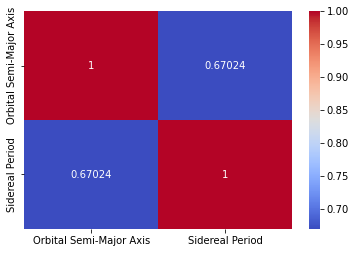

In [15]:
# Plot the heatmap

sns.heatmap(correlation_matrix, annot = True, fmt='.6g', cmap= 'coolwarm')

#### Orbital Semi-Major Axis vs Sidereal Period (Log-Log Model)

Since values are highly dispersed, lets take log values to visualize the relationship:

In [16]:
# Plot For Orbital Semi-Major Axis and Sidereal Period of the moons

# Create series having log values

ser1 = np.log(df['Orbital Semi-Major Axis'])
ser2 = np.log(df['Sidereal Period'])

# Create a new dataframe with the above two series

df1 = pd.DataFrame({'Orbital Semi-Major Axis(Log)': ser1, 'Sidereal Period(Log)':ser2})

# Display the output printing the first ten rows of the dataframe

df1.head(10)


Orbital Semi-Major Axis(Log)  Sidereal Period(Log)
Planet  Natural Satellite                                                    
Earth   Moon                                  12.859436              3.307677
Mars    Phobos                                 9.146335             -1.142564
        Deimos                                10.063052              0.232698
Jupiter Io                                    12.952287              0.570414
        Europa                                13.416673              1.267229
        Ganymede                              13.883543              1.967811
        Callisto                              14.448217              2.814810
        Amalthea                              12.108460             -0.697155
        Himalia                               16.254461              5.523698
        Elara                                 16.278598              5.559296

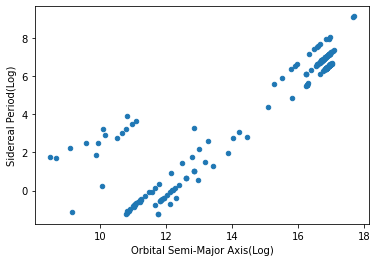

In [17]:
# Visualize using the scatter plot

df1.plot(x = 'Orbital Semi-Major Axis(Log)', y = 'Sidereal Period(Log)', kind= 'scatter')

# Display the plot 

plt.show()

#### Results

1. From the above plot, we can see some positively correlated relationship between the orbital semi-major axis and sidereal period.

2. In conclusion:
On Log scale, as the size of semi-major axis increases for a moon, sidereal period is directly proportional and increases.


"I pledge on my honor that I have not given nor received any unauthorized
     assistance on this assignment."

--Pruthvi Shyam Billa